In [1]:
import pandas as pd
import numpy as np
import yfinance as yf


In [2]:
import datetime #step 1 collect data using yahoofinance

assets = ["AAPL", "MSFT", "AMZN", "META", "TLT", "IEF", "BND"]
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2024, 12, 31)

data = yf.download(assets, start=start_date, end=end_date)

if 'Close' in data.columns:
    close_price_df = data['Close']
elif 'Adj Close' in data.columns:
    close_price_df = data['Adj Close']
else:
    print("No 'Close' or 'Adj Close' column found")


C:\Users\iskas\AppData\Local\Temp\ipykernel_24608\3697005846.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(assets, start=start_date, end=end_date)
[*********************100%***********************]  7 of 7 completed


In [3]:
close_price_df.head()

Ticker,AAPL,AMZN,BND,IEF,META,MSFT,TLT
Date,,,,,,,
2014-01-02,17.192827,19.898500,58.049797,78.334290,54.411495,30.939615,75.496254
2014-01-03,16.815161,19.822001,58.057041,78.287079,54.262318,30.731462,75.496254
2014-01-06,16.906864,19.681499,58.107735,78.507240,56.887909,30.082026,75.813904
2014-01-07,16.785950,19.901501,58.180210,78.633095,57.603973,30.315161,76.006042
2014-01-08,16.892256,20.096001,57.991833,78.247772,57.912289,29.773979,75.799210


In [4]:
close_price_df.tail()

Ticker,AAPL,AMZN,BND,IEF,META,MSFT,TLT
Date,,,,,,,
2024-12-23,254.655716,225.059998,70.381149,90.466118,598.856018,433.583038,85.647064
2024-12-24,257.578674,229.050003,70.482185,90.515175,606.742920,437.647369,86.009232
2024-12-26,258.396667,227.050003,70.531242,90.583862,602.350220,436.432068,85.960297
2024-12-27,254.974930,223.750000,70.384087,90.348381,598.816101,428.881104,85.255539
2024-12-30,251.593079,221.300003,70.658760,90.878227,590.260254,423.202911,85.940727


In [5]:
#step 2 define a function that generates random portfolio weights
# make sure sum of all the weights is equal to 1
import random
def generate_random_weights(n):
    weights = [ ]
    for i in range(n):
        weights.append(random.random())
    weights = weights/np.sum(weights)
    return weights
       

In [6]:
weights = generate_random_weights(7)
print(weights)

[0.09168276 0.0400135  0.14258748 0.17937424 0.03652987 0.21033505
 0.29947708]


In [7]:
#step 3 generate a function that calculates expected return, expected volatility, sharpe ratio
def simulation_engine(weights):
    # Daily returns for all assets
    daily_returns_df = close_price_df.pct_change()
    
    # Expected return
    expected_return = np.sum(weights * daily_returns_df.mean()) * 252
    
    # Covariance matrix
    covariance = daily_returns_df.cov() * 252
    
    # Expected volatility
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))
    
    # Sharpe Ratio
    rf = 0.02
    sharpe_ratio = (expected_return - rf) / expected_volatility

    return expected_return, expected_volatility, sharpe_ratio


In [8]:
#step 4 generate 10000 random portfolios
sim_runs = 10000
n = 7

weights_runs = np.zeros((sim_runs, n))
returns_runs = np.zeros(sim_runs)
volatility_runs = np.zeros(sim_runs)
sharpe_runs = np.zeros(sim_runs) 

for i in range(sim_runs):
    weights = generate_random_weights(n)
    expected_return, expected_volatility, sharpe_ratio = simulation_engine(weights)

    weights_runs[i, :] = weights
    returns_runs[i] = expected_return
    volatility_runs[i] = expected_volatility
    sharpe_runs[i] = sharpe_ratio  

    if i < 5:
        print("Simulation run:", i+1)
        print("Weights:", weights)
        print("Expected Portfolio Return:", expected_return)
        print("Expected Volatility:", expected_volatility)
        print("Sharpe Ratio:", sharpe_ratio)
        print("-------")


Simulation run: 1
Weights: [0.00697546 0.09736585 0.11597753 0.09413803 0.19710073 0.19490854
 0.29353386]
Expected Portfolio Return: 0.14902396078485747
Expected Volatility: 0.14178638051685905
Sharpe Ratio: 0.9099883946153484
-------
Simulation run: 2
Weights: [0.10691291 0.3470242  0.0479584  0.07494141 0.32899779 0.06132068
 0.03284461]
Expected Portfolio Return: 0.23931111509638786
Expected Volatility: 0.24016849686867844
Sharpe Ratio: 0.9131552137593835
-------
Simulation run: 3
Weights: [0.18842338 0.07020163 0.20902152 0.00128723 0.22448368 0.16772937
 0.1388532 ]
Expected Portfolio Return: 0.19027706005653533
Expected Volatility: 0.1707899882603287
Sharpe Ratio: 0.9969967314301145
-------
Simulation run: 4
Weights: [0.17535297 0.16009713 0.18015231 0.01416556 0.21868822 0.19893288
 0.05261093]
Expected Portfolio Return: 0.2156449884518811
Expected Volatility: 0.19561189794562642
Sharpe Ratio: 1.0001691640774524
-------
Simulation run: 5
Weights: [0.09192338 0.19344135 0.214073

In [9]:
#step 5 optimization at the highest sharpe ratio
max_sharpe_index = sharpe_runs.argmax()
print(max_sharpe_index)

7243


In [10]:
optimal_weights = weights_runs[max_sharpe_index]
optimal_return = returns_runs[max_sharpe_index]
optimal_volatility = volatility_runs[max_sharpe_index]
optimal_sharpe_ratio = sharpe_runs[max_sharpe_index]

In [11]:
print("optimal Portfolio Allocation:")
print("weights:", optimal_weights)
print("Expected Annual Return:", optimal_return)
print("Expected Annual Volatility:", optimal_volatility)
print("sharpe ratio:", optimal_sharpe_ratio)

optimal Portfolio Allocation:
weights: [0.3388867  0.09958887 0.07272954 0.01039911 0.04300717 0.27037721
 0.1650114 ]
Expected Annual Return: 0.21495701040191675
Expected Annual Volatility: 0.1833053629466243
sharpe ratio: 1.0635641383754018


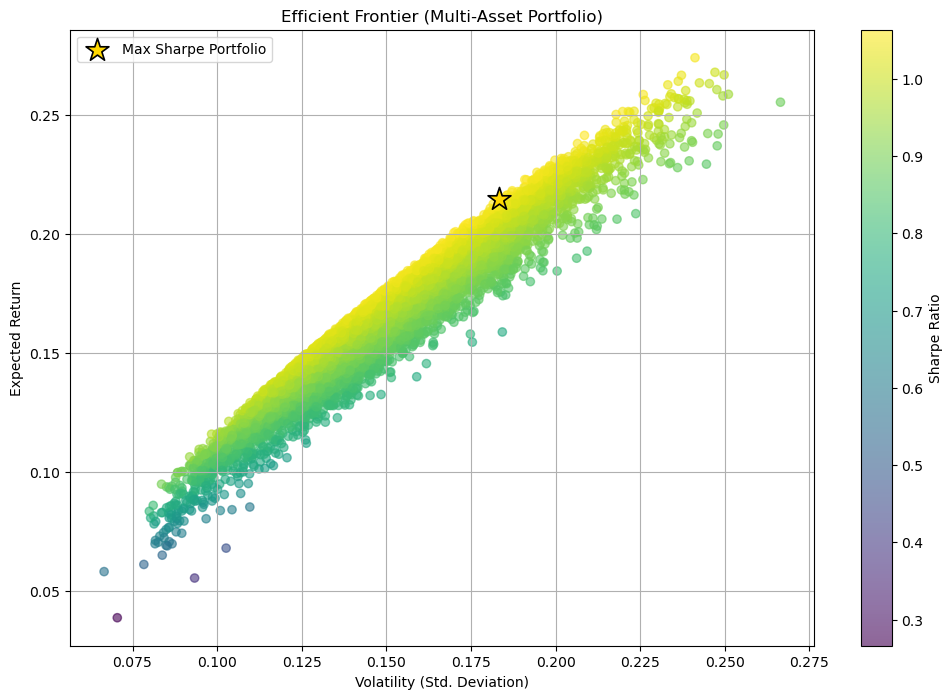

In [12]:
import matplotlib.pyplot as plt

max_sharpe_idx = sharpe_runs.argmax()

max_sharpe_return = returns_runs[max_sharpe_index]
max_sharpe_volatility = volatility_runs[max_sharpe_index]

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    volatility_runs,
    returns_runs,
    c=sharpe_runs,
    cmap='viridis',
    alpha=0.6)
plt.colorbar(scatter, label='Sharpe Ratio')

plt.scatter(
    max_sharpe_volatility,
    max_sharpe_return,
    color='gold',
    marker='*',
    s=300,
    edgecolors='black',
    linewidths=1.2,
    label='Max Sharpe Portfolio')

plt.title('Efficient Frontier (Multi-Asset Portfolio)')
plt.xlabel('Volatility (Std. Deviation)')
plt.ylabel('Expected Return')
plt.grid(True)
plt.legend()

plt.savefig('efficient_frontier_multi_asset.png', dpi=300, bbox_inches='tight')
plt.show()
